<a href="https://colab.research.google.com/github/SP4567/Personal_AI_Health_Assistant/blob/main/Personal_AI_Health_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chronic_conditions.csv")

In [3]:
df

,Condition,Description,Symptoms
0,Hypertension,A condition where the force of the blood again...,"Headaches, shortness of breath, nosebleeds"
1,Coronary Artery Disease,Damage or disease in the heart's major blood v...,"Chest pain, shortness of breath, fatigue"
2,Congestive Heart Failure,A chronic condition where the heart doesn't pu...,"Fatigue, swelling in legs, rapid heartbeat"
3,Arrhythmias,"Improper beating of the heart, whether irregul...","Palpitations, dizziness, fainting"
4,Peripheral Artery Disease,A circulatory condition in which narrowed bloo...,"Leg pain while walking, numbness, coldness in ..."
5,Stroke,Occurs when the blood supply to part of the br...,"Sudden numbness, confusion, trouble speaking"
6,Alzheimer’s Disease,A progressive disease that destroys memory and...,"Memory loss, confusion, mood swings"
7,Parkinson’s Disease,A disorder of the central nervous system that ...,"Tremor, slow movement, stiffness"
8,Multiple Sclerosis,A disease in which the immune system eats away...,"Numbness, fatigue, walking difficulties"
9,Epilepsy,A neurological disorder marked by sudden recur...,"Seizures, staring spells, temporary confusion"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Condition    51 non-null     object
 1   Description  51 non-null     object
 2   Symptoms     51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [5]:
df.value_counts()

,,,count
Condition,Description,Symptoms,
Alzheimer’s Disease,A progressive disease that destroys memory and other important mental functions.,"Memory loss, confusion, mood swings",1
Anxiety,A mental health disorder characterized by feelings of worry or fear.,"Nervousness, restlessness, rapid breathing",1
Arrhythmias,"Improper beating of the heart, whether irregular, too fast, or too slow.","Palpitations, dizziness, fainting",1
Asthma,A condition in which your airways narrow and swell and may produce extra mucus.,"Wheezing, coughing, chest tightness",1
Bipolar Disorder,A disorder associated with episodes of mood swings.,"Mania, depression, irritability",1
Breast Cancer,A cancer that forms in the cells of the breasts.,"Lump, nipple discharge, change in breast shape",1
COPD,A group of lung diseases that block airflow and make it difficult to breathe.,"Shortness of breath, wheezing, chest tightness",1
Celiac Disease,An immune reaction to eating gluten.,"Diarrhea, bloating, fatigue",1
Chronic Back Pain,Long-term back pain that lasts for 12 weeks or longer.,"Persistent pain, stiffness, reduced range of motion",1


In [6]:
df.isnull()

,Condition,Description,Symptoms
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


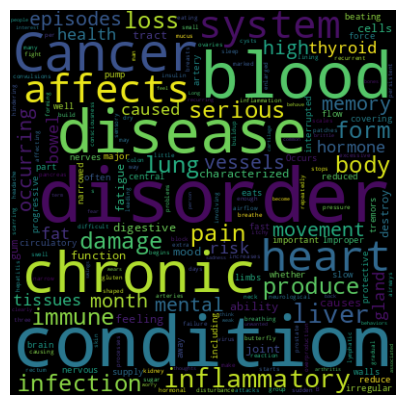

In [7]:
from wordcloud import WordCloud
text = ' '.join(df['Description'].astype(str).tolist())
wordcloud = WordCloud(height = 400, width = 400, background_color = 'black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

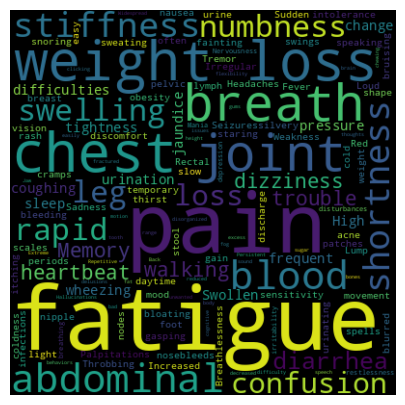

In [8]:
from wordcloud import WordCloud
text = ' '.join(df['Symptoms'].astype(str).tolist())
wordcloud_ = WordCloud(height = 400, width = 400, background_color = 'black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

In [9]:
print(text)

Headaches, shortness of breath, nosebleeds Chest pain, shortness of breath, fatigue Fatigue, swelling in legs, rapid heartbeat Palpitations, dizziness, fainting Leg pain while walking, numbness, coldness in leg or foot Sudden numbness, confusion, trouble speaking Memory loss, confusion, mood swings Tremor, slow movement, stiffness Numbness, fatigue, walking difficulties Seizures, staring spells, temporary confusion Throbbing pain, nausea, sensitivity to light Shortness of breath, wheezing, chest tightness Wheezing, coughing, chest tightness Loud snoring, gasping during sleep, daytime fatigue Shortness of breath, dizziness, chest pressure Increased thirst, frequent urination, fatigue Weight loss, blurred vision, fatigue Fatigue, weight gain, cold intolerance Weight loss, rapid heartbeat, sweating Irregular periods, acne, obesity Breathlessness, joint pain, fatigue Joint pain, stiffness, swelling Fatigue, rash, joint pain Abdominal pain, diarrhea, weight loss Rectal bleeding, diarrhea, a

In [10]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

In [11]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
df['Output'] = df[['Condition', 'Description']].values.tolist()

In [13]:
def encode_symptoms(symptom_text):
  embeddings = []
  for text in tqdm(symptom_text):
    inputs = tokenizer(text, return_tensors = "pt", truncation = True, padding = True, max_length = 128)
    with torch.no_grad():
      outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
    embeddings.append(cls_embedding)
  return np.array(embeddings).reshape(len(embeddings), -1)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = encode_symptoms(df['Symptoms'].tolist())
y = mlb.fit_transform(df['Output'])

100%|██████████| 51/51 [00:04<00:00, 10.33it/s]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [17]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=200, random_state = 100))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=200,
                                                       random_state=100))

In [18]:
predictions = model.predict(X_test)

In [19]:
print(predictions)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [39]:
# # Predict for a new symptom input
# def get_health_info(symptom_input):
#     # Encode the symptom input using the same BERT tokenizer and model
#     input_embedding = encode_symptoms([symptom_input]) # Encode the input symptom

#     # Get predicted probabilities for each condition
#     predicted_probs = model.predict_proba(input_embedding)[0]

#     # Get the index of the condition with the highest probability
#     predicted_condition_index = np.argmax(predicted_probs)

#     # Get the actual condition label using the index and classes_ attribute of the MultiOutputClassifier
#     predicted_condition = mlb.classes_[predicted_condition_index]

#     # Get the description from your dataset (first match)
#     # Check if the predicted condition exists in the DataFrame
#     if predicted_condition in df['Condition'].values:
#         match = df[df['Condition'] == predicted_condition].iloc[0]
#         condition = match['Condition']
#         description = match['Description']
#     else:
#         # Handle the case where the predicted condition is not found
#         condition = "Unknown"
#         description = "Condition not found in the database."


#     # You can hardcode or generate tips based on the condition
#     suggestions_dict = {
#         "Diabetes": "Maintain a balanced diet, monitor blood sugar levels, and exercise regularly.",
#         "Asthma": "Avoid allergens, carry your inhaler, and stay indoors during high-pollen days.",
#         "Hypertension": "Reduce salt intake, manage stress, and exercise regularly.",
#         # Add more conditions here...
#     }

#     suggestions = suggestions_dict.get(condition, "Consult a healthcare professional for advice.")

#     return {
#         'condition': condition,
#         'description': description,
#         'suggestions': suggestions
#     }

# # Example usage
# symptom_input = "Headaches, shortness of breath, nosebleeds"
# result = get_health_info(symptom_input)

# print(result)
!pip install google-generativeai
import google.generativeai as genai

# Initialize Gemini model (do this once, ideally outside the function)
genai.configure(api_key="")  # Replace with your Gemini API key
gemini_model = genai.GenerativeModel('gemini-2.0-flash')


def get_health_info(symptom_input):
    # Encode the input symptom
    input_embedding = encode_symptoms([symptom_input])
    if input_embedding is None or len(input_embedding) == 0:
        return {
            'condition': "Unknown",
            'description': "Symptom encoding failed.",
            'suggestions': "Consult a healthcare professional for advice."
        }

    # Get predicted probabilities
    predicted_probs = model.predict_proba(input_embedding)

    # Collect the highest probability for each condition
    max_probs = []
    for i, probs in enumerate(predicted_probs):
        prob_value = probs[0][1] if probs[0].shape[0] == 2 else probs[0][0]  # Binary case
        max_probs.append(prob_value)

    # Get the index of the highest predicted probability
    predicted_condition_index = np.argmax(max_probs)
    highest_prob = max_probs[predicted_condition_index]

    # Set threshold
    threshold = 0.5

    # Determine the predicted condition
    if highest_prob > threshold:
        predicted_condition = mlb.classes_[predicted_condition_index]
    else:
        predicted_condition = "Unknown"

    # Lookup condition info
    if predicted_condition in df['Condition'].values:
        match = df[df['Condition'] == predicted_condition].iloc[0]
        condition = match['Condition']
        description = match['Description']
    else:
        condition = "Unknown"
        description = "Condition not found in the database."

    # Use Gemini to generate suggestions if a valid condition is found
    if condition != "Unknown":
        prompt = (
            f"You are a medical assistant. A patient reported the following symptoms: '{symptom_input}'. "
            f"A condition '{condition}' has been predicted. "
            f"Give a brief explanation of what this condition is, followed by 2–3 lifestyle or self-care suggestions. "
            f"Be concise, empathetic, and medically sound."
        )
        try:
            gemini_response = gemini_model.generate_content(prompt)
            suggestions = gemini_response.text.strip()
        except Exception as e:
            suggestions = "Unable to generate suggestions at the moment. Please consult a healthcare professional."
            print(f"Gemini error: {e}")
    else:
        suggestions = "Consult a healthcare professional for advice."

    # Debug prints
    print(f"Input: {symptom_input}")
    print(f"Predicted condition: {condition}")
    print(f"Highest probability: {highest_prob:.4f}")

    return {
        'condition': condition,
        'description': description,
        'suggestions': suggestions
    }

In [40]:
symptom_input = "Memory loss, confusion, mood swings"
result = get_health_info(symptom_input)
print(result)

100%|██████████| 1/1 [00:00<00:00, 14.74it/s]


Input: Memory loss, confusion, mood swings
Predicted condition: Unknown
Highest probability: 1.0000
{'condition': 'Unknown', 'description': 'Condition not found in the database.', 'suggestions': 'Consult a healthcare professional for advice.'}
